In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
# Regular modules for data science and visualization:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import random

# Keras (2.2.4) and tensorflow (1.13).
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import tf_sentencepiece

from keras.regularizers import l1, l2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend
from keras import optimizers

#sklearn and imblearn modules:
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE

In [ ]:
#Density:
p = 0.4
df = pd.read_csv('/content/drive/MyDrive/archive/articles2.csv',header=None,skiprows=lambda i: 1>0 and random.random() > p)
print(df.head(5))
print(df.columns)

         0      1  ...    8                                                  9
0      NaN     id  ...  url                                            content
1  53294.0  73472  ...  NaN  In Norse mythology, humans and our world were ...
2  53299.0  73478  ...  NaN  In Barack Obama’s final speech as president, h...
3  53303.0  73486  ...  NaN  That retired General James “Mad Dog” Mattis, D...
4  53304.0  73487  ...  NaN             This article is part of a feature w...

[5 rows x 10 columns]
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


In [ ]:
print(df[0].values)
# NAN, id, title, publication, author, date, year, month, url, content
#First batch:
n_s_a = df[df[3] == 'Atlantic']
n_s_p = df[df[3] == 'New York Post']
#Second batch:
#df = pd.read_csv('/content/drive/MyDrive/archive/articles1.csv',header=None,skiprows=lambda i: 1>0 and random.random() > p)
n_s_b = df[df[3] == 'Breitbart']
n_s_n = df[df[3] == 'New York Times']

[    nan  53294.  53299. ... 103455. 103456. 103457.]


In [ ]:
n_s = list(n_s_b.iloc[:,9].values) + list(n_s_p.iloc[:,9].values) \
 + list(n_s_a.iloc[:,9].values) + list(n_s_n.iloc[:,9].values)

In [ ]:
n_s = [word.replace('New York Post','') for word in n_s]
n_s = [word.replace('Breitbart','') for word in n_s]
n_s = [word.replace('New York Times','') for word in n_s]
n_s = [word.replace('Atlantic','') for word in n_s]

#Outlet classifier:
classes_All = np.asarray([1 for i in range(len(n_s_b))] + [2 for i in range(len(n_s_p))] + [3 for i in range(len(n_s_a))] +
[4 for i in range(len(n_s_n))])
#Bias classifier: #1 meaning right wing, 2 meaning left wing
classes_Bias = np.asarray([1 for i in range(len(n_s_b))] + 
[1 for i in range(len(n_s_p))] + [2 for i in range(len(n_s_a))] + 
[2 for i in range(len(n_s_n))])

In [ ]:
print(len(n_s))
print(n_s[0])

9763
ISTANBUL  —   An assailant believed to have been dressed in a Santa Claus costume opened fire at a nightclub in Istanbul during New Year’s celebrations Saturday, killing at least 35 people and wounding 40 others in what the city’s governor described as a terror attack. Gov. Vasip Sahin said the attacker, armed with a   weapon, killed a policeman and a civilian outside the club before entering and firing on people partying inside. He did not say who may have carried out what he called a “terror attack. ” “Unfortunately (he) rained bullets in a very cruel and merciless way on innocent people who were there to celebrate New Year’s and have fun,” Sahin told reporters. Media reports said the assailant entered the popular Reina nightclub, in Istanbul’s Ortakoy district, at 1:45 am, dressed in a Santa Claus costume. There were more than 500 people inside the club at the time, private NTV television reported. Some customers jumped into the waters of the Bosporus to escape the attack, the 

In [ ]:
# tfidf vectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
# from nltk import RegexpTokenizer
# tokenizer = RegexpTokenizer("[a-z]{2,}")

# # n_s_b.iloc[:,9].values + n_s_p.iloc[:,9].values + n_s_a.iloc[:,9].values + n_s_n.iloc[:,9].values 
# all_content = df[9].values[1:]
# print(type(all_content))
# vectorizer = TfidfVectorizer(ngram_range=(1,7) 
#                                 , min_df = 1
#                                 , max_df=1
#                                 , tokenizer = tokenizer.tokenize
#                                 , max_features=10000
#                                 , stop_words="english")
# e_All= vectorizer.fit_transform(all_content)
# print(df.shape)
print(n_s[0])
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
tokenized_sent = []
if len(n_s) % 2 == 1:
    n_s = n_s[1:]
    classes_Bias = classes_Bias[1:]
# for s in n_s:
#     tokenized_sent.append(sent_tokenize(s.lower()))
# tokenized_sent = []
for s in n_s:
    tokenized_sent.append(word_tokenize(s.lower()))
print(tokenized_sent[0])
print(len(tokenized_sent))

ISTANBUL  —   An assailant believed to have been dressed in a Santa Claus costume opened fire at a nightclub in Istanbul during New Year’s celebrations Saturday, killing at least 35 people and wounding 40 others in what the city’s governor described as a terror attack. Gov. Vasip Sahin said the attacker, armed with a   weapon, killed a policeman and a civilian outside the club before entering and firing on people partying inside. He did not say who may have carried out what he called a “terror attack. ” “Unfortunately (he) rained bullets in a very cruel and merciless way on innocent people who were there to celebrate New Year’s and have fun,” Sahin told reporters. Media reports said the assailant entered the popular Reina nightclub, in Istanbul’s Ortakoy district, at 1:45 am, dressed in a Santa Claus costume. There were more than 500 people inside the club at the time, private NTV television reported. Some customers jumped into the waters of the Bosporus to escape the attack, the repor

In [ ]:
!pip install sentence-transformers

In [ ]:
print(len(max(n_s)))

8580


In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('nli-bert-base')

sentence_embeddings = sbert_model.encode(tokenized_sent)


In [ ]:
# print(type(e_All))
# print(e_All.shape)
# print(e_All)
# print(len(classes_All))
# e_All.todense()
# print(type(e_All))
# print(e_All.shape)
print(sentence_embeddings[0])
print(type(sentence_embeddings))
print(sentence_embeddings.shape)

[ 8.10996518e-02 -5.47893822e-01  1.92805362e+00  3.81115854e-01
  5.86899638e-01  8.01326782e-02 -5.08915372e-02  4.83144134e-01
  2.45196819e-01  1.09903011e-02 -3.53559345e-01  4.05636966e-01
  2.78064549e-01  5.62138915e-01  1.15681565e+00 -8.09862763e-02
 -1.08686306e-01 -4.68305409e-01 -4.25148189e-01 -1.02251184e+00
  4.03789431e-01  4.50325072e-01  2.26372153e-01 -9.34358478e-01
 -1.33754373e-01 -6.82656884e-01 -5.25530636e-01 -1.25113034e+00
 -3.55922908e-01  4.57767963e-01 -3.43807518e-01  1.87217638e-01
  9.04111862e-02  6.64916560e-02  5.35626709e-01  1.59702033e-01
 -3.48248541e-01  7.20397010e-02  1.85384810e-01 -2.82648295e-01
  1.42276430e+00  9.40239578e-02  4.15847152e-01 -2.99789339e-01
 -1.26842809e+00  3.39319289e-01  2.98294604e-01 -3.44704300e-01
  3.60839903e-01 -2.23960328e+00  2.58696862e-02  6.90049538e-03
  1.34619904e+00  1.02744639e+00 -4.27791655e-01  1.29339784e-01
  4.02560651e-01 -3.77488166e-01  3.63939643e-01  8.73955727e-01
  2.95883238e-01 -6.42059

In [ ]:
optim = tf.keras.optimizers.Adam(lr=0.00015)
from tensorflow.keras.layers import Input


# create NN for news clissification:
news_DNN = Sequential()
news_DNN.add(Input(shape=(768,)))
news_DNN.add(Dense(40, activation = 'relu',kernel_regularizer=l2(0.1)))
news_DNN.add(Dropout(0.25))
news_DNN.add(Dense(40, activation = 'relu',kernel_regularizer=l2(0.1)))
news_DNN.add(Dropout(0.25))


# Output layer with multiclass activation function:
news_DNN.add(Dense(4,activation='softmax'))

# Compile model:
news_DNN.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['acc'])

news_DNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                30760     
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 164       
                                                                 
Total params: 32,564
Trainable params: 32,564
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# split into shuffled folds:
#Note that you should edit the class array accordingly: Bias (classes_Bias) or Outlet (classes_All)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33) # chose one split to make analysis faster. change it if required
scaler = StandardScaler(with_mean=False)
#classes_Bias = classes_Bias[1:]
for t, te in sss.split(sentence_embeddings,classes_Bias):
  # Scale the data with StandardScaler before splitting:
    X_train, X_test = scaler.fit_transform(sentence_embeddings)[t], \
    scaler.fit_transform(sentence_embeddings)[te]

    y_train, y_test = classes_All[t]-1,classes_All[te]-1

In [ ]:
print(X_train.shape, y_train.shape)

(6540, 768) (6540,)


In [ ]:
#Fitting the model
#fit the network. You can change parameters to see how this affects your training.
m_h = news_DNN.fit(X_train, y_train, epochs=100, \
validation_data=(X_test, y_test), batch_size=32)

Train on 6540 samples, validate on 3222 samples
Epoch 1/100
6240/6540 [===========================>..] - ETA: 0s - loss: 11.0489 - acc: 0.6186

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


6540/6540 [==============================] - 1s 141us/sample - loss: 10.9542 - acc: 0.6232 - val_loss: 8.7647 - val_acc: 0.8343
Epoch 2/100
6540/6540 [==============================] - 1s 120us/sample - loss: 7.4560 - acc: 0.7517 - val_loss: 6.0366 - val_acc: 0.8392
Epoch 3/100
6540/6540 [==============================] - 1s 126us/sample - loss: 5.2049 - acc: 0.7894 - val_loss: 4.2594 - val_acc: 0.8541
Epoch 4/100
6540/6540 [==============================] - 1s 122us/sample - loss: 3.7053 - acc: 0.8142 - val_loss: 3.0773 - val_acc: 0.8470
Epoch 5/100
6540/6540 [==============================] - 1s 122us/sample - loss: 2.7269 - acc: 0.8223 - val_loss: 2.2879 - val_acc: 0.8547
Epoch 6/100
6540/6540 [==============================] - 1s 122us/sample - loss: 2.0494 - acc: 0.8381 - val_loss: 1.7252 - val_acc: 0.8523
Epoch 7/100
6540/6540 [==============================] - 1s 122us/sample - loss: 1.5761 - acc: 0.8394 - val_loss: 1.3488 - val_acc: 0.8569
Epoch 8/100
6540/6540 [===============

In [ ]:
from sklearn.metrics import f1_score
predict_x=news_DNN.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
y_pred = np.round(predict_x).astype(int)

print(y_test.shape, classes_x.shape)
f1_score(y_test, classes_x, average=None)

(3222,) (3222,)


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([0.89953567, 0.72098476])

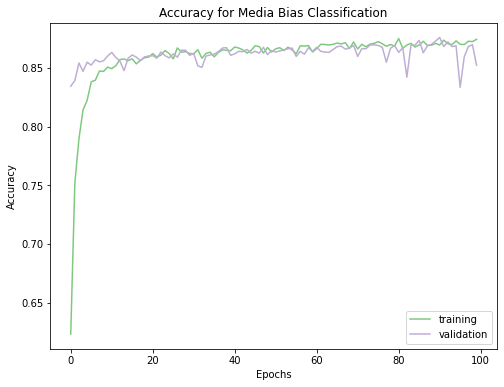

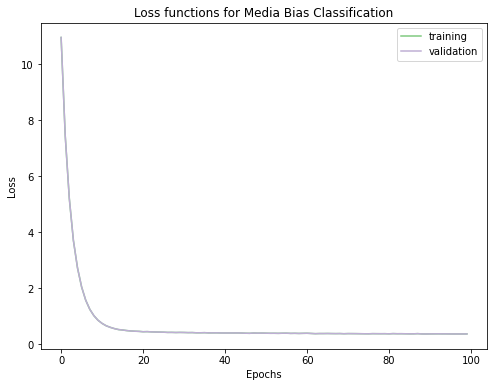

In [ ]:
with sns.color_palette("Accent", n_colors=8):
    plt.figure(figsize=(8,6))
    sns.lineplot(data=np.asarray(m_h.history['acc']))
    sns.lineplot(data=np.asarray(m_h.history['val_acc']))
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy for Media Bias Classification") # change title here
    plt.legend(labels=['training', 'validation'],loc='lower right')
    plt.savefig('outlets_bias_acc.svg',format='svg') # edit file title here
with sns.color_palette("Accent", n_colors=8):
    plt.figure(figsize=(8,6))
    sns.lineplot(data=np.asarray(m_h.history['loss']))
    sns.lineplot(data=np.asarray(m_h.history['loss']))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss functions for Media Bias Classification") #change title here
    plt.legend(labels=['training', 'validation'])
    plt.savefig('outlets_bias_loss.svg',format='SVG') # edit file title here